In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [2]:
#시각화를 위한 color 딕셔너리
color_dic = {0:['#005b6e','#04668c'],1:['#3c6ca7','#786eb7'],2:['#a86bba','#da66ac'],
             3:['#ff6792','#aa6792'],4:['#d8e0bb','#b6cec7'],5:['#ff5050','#ffaa00'],
            6:['#ff99ff','#ff6699',],7:['#e6f2ff','#99ccff'],8:['#ccccff','#cc99ff'],
            9:['#ff9966', '#ff6600']}

In [3]:
fifa_df = pd.read_csv('./Fifa/FIFA_train.csv')

In [4]:
fifa_df

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [5]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


# Data Preprocessing

In [6]:
feature_all = fifa_df.columns[2:]

## Object type -> Numerical type

In [7]:
for ind in list(filter(lambda x: len(fifa_df.loc[x,'contract_until'])>4, fifa_df.index)):
    fifa_df.loc[ind,'contract_until'] = fifa_df.loc[ind,'contract_until'].split()[-1]

In [8]:
fifa_df['contract_until'] = fifa_df['contract_until'].astype('int')

In [9]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   int32  
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int32(1), int64(4), object(4)
memory usage: 802.6+ KB


# Encoding

## Label Encoding

In [10]:
# object -> categorical type
target_feat = list(filter(lambda x: fifa_df[x].nunique ()<=5,feature_all))

In [11]:
target_feat

['continent', 'position', 'prefer_foot', 'reputation', 'stat_skill_moves']

In [12]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for col in target_feat:
    fifa_df[col]=label.fit_transform(fifa_df[col])

In [13]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   int32  
 4   contract_until    8932 non-null   int32  
 5   position          8932 non-null   int32  
 6   prefer_foot       8932 non-null   int32  
 7   reputation        8932 non-null   int64  
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   int64  
 11  value             8932 non-null   float64
dtypes: float64(1), int32(4), int64(6), object(1)
memory usage: 697.9+ KB


In [14]:
len(feature_all)

10

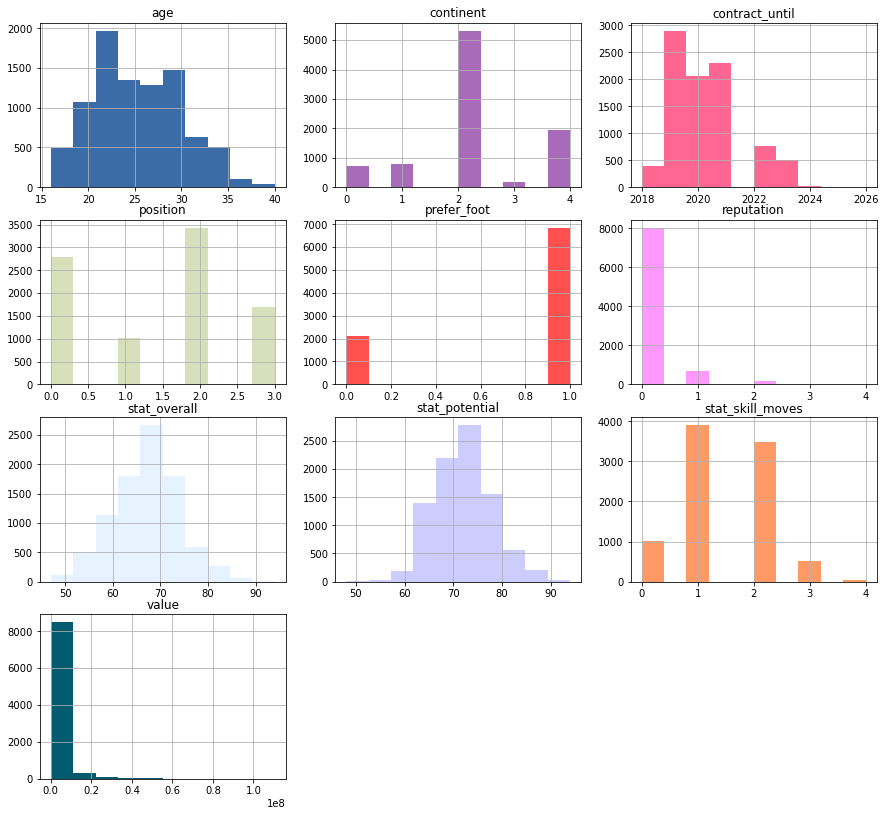

In [15]:
plt.figure(figsize=(15,12))
for e,col in enumerate(feature_all,1):
    plt.subplot(4,3,e)
    plt.subplots_adjust(top=1)
    plt.title(col)
    fifa_df[col].hist(color=color_dic[e%10][0])

# Resampling

In [16]:
fifa_df['value'].describe()

count    8.932000e+03
mean     2.778673e+06
std      5.840982e+06
min      1.000000e+04
25%      3.750000e+05
50%      8.250000e+05
75%      2.600000e+06
max      1.105000e+08
Name: value, dtype: float64

In [17]:
# under_index = list(fifa_df.loc[fifa_df['value']<fifa_df['value'].quantile(0.7)].index)

In [18]:
under_index = list(fifa_df.loc[fifa_df['reputation']<1].loc[fifa_df['value']<fifa_df['value'].quantile(0.5)].index)

In [19]:
len(under_index)

4392

In [20]:
fifa_df.shape

(8932, 12)

In [21]:
fifa_df.drop(index=np.random.choice(under_index,int(len(under_index)*0.4),replace=False,),inplace=True)


In [22]:
# fifa_df.drop(index=np.random.choice(fifa_df.index,int(len(fifa_df.index)*0.5),replace=False),inplace=True)

In [23]:
fifa_df.shape

(7176, 12)

<AxesSubplot:>

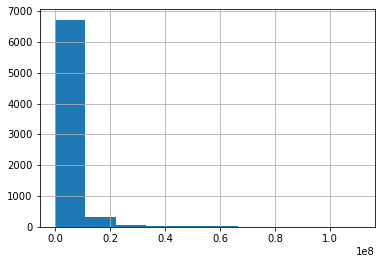

In [24]:
fifa_df['value'].hist()

# Log Transformation

In [25]:
fifa_df['value_log'] = np.log1p(fifa_df['value'])

In [26]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7176 entries, 0 to 8930
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7176 non-null   int64  
 1   name              7176 non-null   object 
 2   age               7176 non-null   int64  
 3   continent         7176 non-null   int32  
 4   contract_until    7176 non-null   int32  
 5   position          7176 non-null   int32  
 6   prefer_foot       7176 non-null   int32  
 7   reputation        7176 non-null   int64  
 8   stat_overall      7176 non-null   int64  
 9   stat_potential    7176 non-null   int64  
 10  stat_skill_moves  7176 non-null   int64  
 11  value             7176 non-null   float64
 12  value_log         7176 non-null   float64
dtypes: float64(2), int32(4), int64(6), object(1)
memory usage: 672.8+ KB


# Standardization

In [27]:
#value는 빼기
feature_all = feature_all[:-1] 

In [28]:
feature_all

Index(['age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves'],
      dtype='object')

In [29]:
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()

In [30]:
fifa_df[feature_all] = stand.fit_transform(fifa_df[feature_all])

In [31]:
len(feature_all)

9

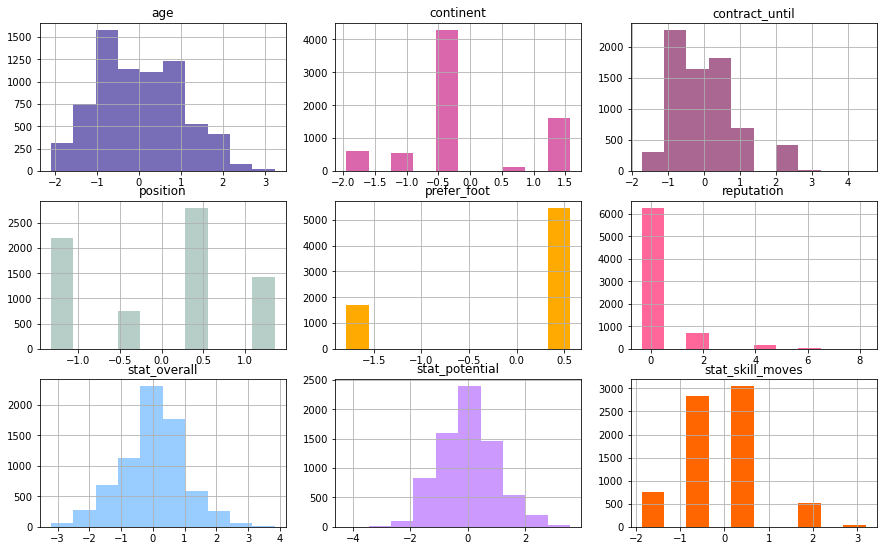

In [32]:
plt.figure(figsize=(15,8))
for e,col in enumerate(feature_all,1):
    plt.subplot(3,3,e)
    plt.subplots_adjust(top=1)
    plt.title(col)
    fifa_df[col].hist(color=color_dic[e%10][1])

# Modeling & Evaluation

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.ensemble import  RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso,ElasticNet
from lightgbm import LGBMRegressor

def get_reg_eval(model_name, params=None, X_data_n=None, y_target_n = None, verbose=True):

    if verbose: print(f"-------{model_name}------")
    if model_name == 'LGBM':
        model = LGBMRegressor()
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print(f'5 folds 세트의 평균 RMSE: {np.round(avg_rmse,3)}')
    elif model_name =='GB':
        model =GradientBoostingRegressor()
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print(f'5 folds 세트의 평균 RMSE: {np.round(avg_rmse,3)}')
    elif model_name =='RF':
        model = RandomForestRegressor()
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print(f'5 folds 세트의 평균 RMSE: {np.round(avg_rmse,3)}')
    else:
        for param in params:
            if model_name == "Ridge": model = Ridge(alpha= param)
            elif model_name=="Lasso": model = Lasso(alpha=param)
            elif model_name=='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7) #alpha = a+b값, l1_ratio=a/(a+b)

            neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)
            avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
            print(f'alpha: {param}, 5 folds 세트의 평균 RMSE: {np.round(avg_rmse,3)}')

In [34]:
models = ['LGBM','RF','GB']
X_train, X_test, y_train, y_test = train_test_split(fifa_df[feature_all],fifa_df['value'],test_size=0.3)
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(fifa_df[feature_all] , fifa_df['value_log'], test_size= 0.3)

In [36]:
#로그변환 X
for m in models:
    get_reg_eval(m,None,X_train, y_train)    

-------LGBM------
5 folds 세트의 평균 RMSE: 1125778.983
-------RF------
5 folds 세트의 평균 RMSE: 954892.505
-------GB------
5 folds 세트의 평균 RMSE: 829638.088


In [37]:
for m in models:
    get_reg_eval(m,None,X_log_train, y_log_train)    

-------LGBM------
5 folds 세트의 평균 RMSE: 0.089
-------RF------
5 folds 세트의 평균 RMSE: 0.106
-------GB------
5 folds 세트의 평균 RMSE: 0.095


In [38]:
from sklearn.model_selection import GridSearchCV
params = {
        'max_depth':[3,5],
        'learning_rate':[0.1,0.01,0.001],
        'num_iteration':[2000,5000],
        'num_leaves': [50,100],
        'feature_fraction':[1.0,0.8],
        'metric':['rmse']
        }

In [39]:
tuned_target = LGBMRegressor()
grid_cv = GridSearchCV(tuned_target,param_grid = params, cv=5, n_jobs = -1, verbose=3)#n_jobs=-1: 모든 코어 사용,verbose: 로그출력 레벨 조정 
grid_cv.fit(X_log_train, y_log_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.1min finished


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'feature_fraction': [1.0, 0.8],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5], 'metric': ['rmse'],
                         'num_iteration': [2000, 5000],
                         'num_leaves': [50, 100]},
             verbose=3)

In [40]:
print("최적 하이퍼 파라미터", grid_cv.best_params_)
print("최고 예측 정확도:{:.3f}".format(grid_cv.best_score_))

최적 하이퍼 파라미터 {'feature_fraction': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'metric': 'rmse', 'num_iteration': 2000, 'num_leaves': 50}
최고 예측 정확도:0.997


In [41]:
#tuned_model = GradientBoostingRegressor(learning_rate=0.15, max_depth=5, random_state=10)
tuned_model = grid_cv.best_estimator_

In [42]:
neg_mse_scores = cross_val_score(tuned_model, X_test, y_test, scoring="neg_mean_squared_error", cv=5)
avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
print(f'5 folds 세트의 평균 RMSE: {np.round(avg_rmse,3)}')


5 folds 세트의 평균 RMSE: 1635195.917


In [43]:
neg_mse_scores = cross_val_score( tuned_model, X_log_test, y_log_test, scoring="neg_mean_squared_error", cv=5)
avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
print(f'5 folds 세트의 평균 RMSE: {np.round(avg_rmse,3)}')


5 folds 세트의 평균 RMSE: 0.107


<br><br>

# Submission

### train과 똑같이 전처리

In [44]:
def preprocessing(target):  
    #형식 맞추기
    for ind in list(filter(lambda x: len(target.loc[x,'contract_until'])>4, target.index)):
        target.loc[ind,'contract_until'] = target.loc[ind,'contract_until'].split()[-1]
    target['contract_until'] = target['contract_until'].astype('int')
    
    #Label encoding
    for col in target_feat: 
        target[col]=label.fit_transform(target[col])
    
    #standardization
    target[feature_all] = stand.fit_transform(target[feature_all])
    return target

In [45]:
test = pd.read_csv('./Fifa/FIFA_test.csv')
test

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0
...,...,...,...,...,...,...,...,...,...,...,...
3823,16924,R. Takae,20,asia,2021,MF,right,1.0,48,63,2.0
3824,16929,L. Wahlstedt,18,europe,2018,GK,right,1.0,48,65,1.0
3825,16932,Y. Góez,18,south america,2021,MF,right,1.0,48,65,2.0
3826,16937,A. Kaltner,18,europe,2020,ST,right,1.0,47,61,2.0


In [46]:
test_ = preprocessing(test)

In [47]:
test_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3828 non-null   int64  
 1   name              3828 non-null   object 
 2   age               3828 non-null   float64
 3   continent         3828 non-null   float64
 4   contract_until    3828 non-null   float64
 5   position          3828 non-null   float64
 6   prefer_foot       3828 non-null   float64
 7   reputation        3828 non-null   float64
 8   stat_overall      3828 non-null   float64
 9   stat_potential    3828 non-null   float64
 10  stat_skill_moves  3828 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 329.1+ KB


In [ ]:
# tuned_model.fit(fifa_df[feature_all], fifa_df['value'])
# sub = tuned_model.predict(test_[feature_all])

In [48]:
#로그 변환된 y -> expm1으로 스케일 변환
tuned_model.fit(fifa_df[feature_all], fifa_df['value_log'])
sub = np.expm1(tuned_model.predict(test_[feature_all])) 

- 결과 시각화

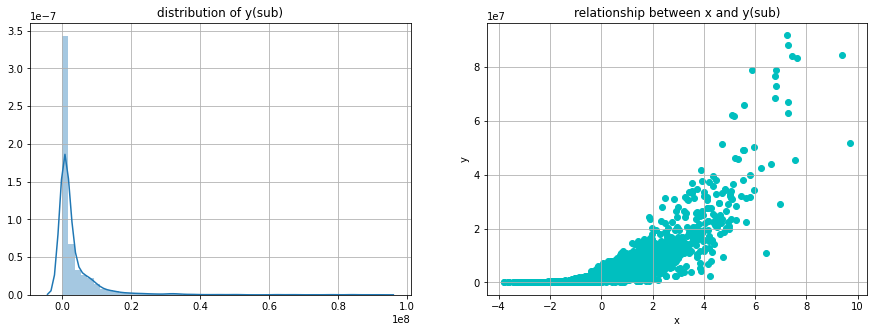

In [49]:
from sklearn.decomposition import PCA
plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
plt.title('distribution of y(sub)')
sns.distplot(sub)
plt.grid(True)

plt.subplot(1,2,2)
#인풋으로 넣은 모든 피처들 -> 1차원 축소
pca_res = PCA(n_components=1)
pca_x = pca_res.fit_transform(test_[feature_all])
plt.title('relationship between x and y(sub)')
plt.scatter(x = pca_x, y= sub,color='c')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [52]:
submission = pd.read_csv('./Fifa/submission.csv')

In [53]:
submission['value'] = sub
submission

,id,value
0,1,5.169358e+07
1,2,8.470465e+07
2,4,8.351559e+07
3,5,9.182114e+07
4,6,6.310433e+07
...,...,...
3823,16924,6.074104e+04
3824,16929,5.182441e+04
3825,16932,5.995996e+04
3826,16937,5.102041e+04


- 제출 파일 저장

In [ ]:
# submission.to_csv('./Fifa/submission30.csv',index=False)

----
- submission30.csv 아직 제출 못함

### 제출 결과 기록

In [50]:
results2 = pd.read_csv('./Fifa/results2.csv')

In [51]:
results2

,model,preprocessing_steps,result
0,"GB(learning_rate=0.15, max_depth=5, random_sta...",3,1032358.86
1,"LGBM(num_iterations=1000, learning_rate= 0.1, ...",3,1122867.78
2,LGBM() / log,3,1237974.94
3,RF() / log,3,1283164.90
4,"LGBMRegressor(boosting_type= dart, reg_alpha= ...",3,6869292.40
5,"LGBM(reg_alpha= 0.3,metric=rmse,learning_rate=...",3,1251582.66
6,"GB(learning_rate=0.15, max_depth=5, random_sta...",3,853212.18
7,"GB(learning_rate=0.15, max_depth=5, random_sta...",3,1711285.15
8,"GB(learning_rate=0.15, max_depth=5, random_sta...",3,1229272.12


- 기록 추가

In [ ]:
# dic = {c:data for c,data in zip(results2.columns, ['GB(learning_rate=0.15, max_depth=5, random_state=10)/log/resamp(rep<1, value<0.5, 0.4)', 3, np.round(1229272.123747006,2)])}
# results2= results2.append(dic,ignore_index=True)

In [54]:
results2

,model,preprocessing_steps,result
0,"GB(learning_rate=0.15, max_depth=5, random_sta...",3,1032358.86
1,"LGBM(num_iterations=1000, learning_rate= 0.1, ...",3,1122867.78
2,LGBM() / log,3,1237974.94
3,RF() / log,3,1283164.90
4,"LGBMRegressor(boosting_type= dart, reg_alpha= ...",3,6869292.40
5,"LGBM(reg_alpha= 0.3,metric=rmse,learning_rate=...",3,1251582.66
6,"GB(learning_rate=0.15, max_depth=5, random_sta...",3,853212.18
7,"GB(learning_rate=0.15, max_depth=5, random_sta...",3,1711285.15
8,"GB(learning_rate=0.15, max_depth=5, random_sta...",3,1229272.12


In [55]:
results2.to_csv('./Fifa/results2.csv',index=False)

## Ensemble

In [56]:
def get_ensemble(start,end):
    submissions=pd.DataFrame()
    for i in range(start,end+1):
        submissions = pd.concat([submissions, pd.read_csv(f'./Fifa/submission{i}.csv')])
    submissions=submissions.reset_index(drop=True)
    return submissions.groupby('id').mean()

In [57]:
get_ensemble(25,29)

,value
id,
1,4.465717e+07
2,8.173072e+07
4,6.457705e+07
5,6.641926e+07
6,5.411441e+07
...,...
16924,5.651252e+04
16929,5.177817e+04
16932,5.988497e+04


In [ ]:
#get_ensemble().to_csv('./Fifa/submission_ensem.csv')